#**Penney Ante Probabilities**
#Drew Honson


In [5]:
import random
import matplotlib.pyplot as plt
plt.style.use("seaborn-colorblind")

def game(x):
    pa = []
    options = ['H','T']
    for i in range(x):
        pa.append(random.choice(options))
    pas = ''.join(pa)
    triplet = []
    for j in range(len(pas)-2):
        triplet.append(pas[j:j+3])
    unique_triplets = set(triplet)
    triplet_count = []
    for k in unique_triplets:
        if k in triplet:
            triplet_count.append(triplet.count(k))
    tripzip = zip(unique_triplets, triplet_count)
    tripdict = dict(tripzip)
    plt.bar(range(len(tripdict)), tripdict.values(), align='center')
    plt.xticks(range(len(tripdict)), tripdict.keys(), rotation='45')
    plt.title("Histogram of Triplet Usage")
    plt.ylabel("Triplet Count")
    plt.show()
    return tripdict

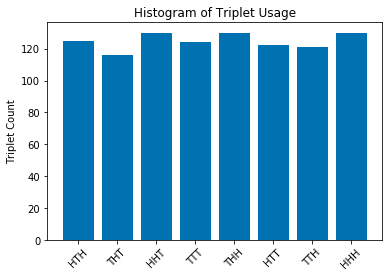

{'HHH': 130,
 'HHT': 130,
 'HTH': 125,
 'HTT': 122,
 'THH': 130,
 'THT': 116,
 'TTH': 121,
 'TTT': 124}

In [6]:
game(1000)

In [9]:
def first(x):
    import random
    import numpy as np
    import pandas as pd
    % matplotlib inline
    first_unique = [] #This list stores the first occurrence of each triplet for each run as a list of lists
    for _ in range(x): #Input to the "first" program determines number of times the loop runs
        pa = []
        triplet = []
        unique_triplet = ['HHH','HHT','HTH','HTT','THH','THT','TTH','TTT']
        options = ['H','T']
        #Run 1000 flips and covert to a string
        for i in range(1000):
            pa.append(random.choice(options))
            pas = ''.join(pa)
        #Convert the string into a list of triplets
        for j in range(len(pas)-2):
            triplet.append(pas[j:j+3])
        #Append the first occurrence of each triplet for one run to a list
        unique_list = []
        for i in unique_triplet:
            unique_list.append(triplet.index(i)+1)
        #Store the results for each run to a list of lists outside the loop
        #The program breaks somewhere around here if one triplet is not represented in one of the runs
        #This happens if you run more than a million or so games
        first_unique.append(unique_list)
    #Convert first_unique to a Pandas array and label the columns with the corresponding triplet
    first_panda = pd.DataFrame(np.array(first_unique), columns = unique_triplet)
    #Print a boxplot
    first_panda.boxplot(figsize = (10,100))
    #Print the means of the first occurrence of each triplet
    return first_panda.mean()


HHH    12.1421
HHT     5.9199
HTH     7.9039
HTT     6.0320
THH     5.8362
THT     8.0296
TTH     6.0067
TTT    12.0735
dtype: float64

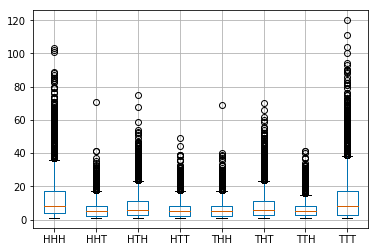

In [10]:
first(10000)